# Clifford Algebras

This notebook computes a basis of the real clifford algebra $Cl(s,t)$ in $s$ space and $t$ time dimensions.

Our convention is that $\Gamma_{(s)}^2=-1$ and $\Gamma_{(t)}^2=1$.

## Initialization

In [1]:
from sympy.interactive.printing import init_printing
init_printing(use_unicode=True, wrap_line=False, no_global=True)

In [2]:
from sympy import I, binomial, Symbol
from sympy.matrices import Matrix, eye
from sympy.physics.quantum import TensorProduct

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Some Definitions 

We define the low dimensional clifford algebras as:

$Cl(0,0)=\langle 1 \rangle \simeq \mathbb{R}(1)$

$Cl(1,0)=\langle 1, i \rangle \simeq \mathbb{C}(1)$

$Cl(0,1)=\langle 1, \sigma_2 \rangle \simeq \mathbb{R}(1)\oplus\mathbb{R}(1)$

$Cl(2,0)=\langle 1, \gamma_1, \gamma_2, \gamma_{12} \rangle \simeq \mathbb{H}(1)$

$Cl(1,1)=\langle 1, \sigma_1, \gamma_1, \sigma_1\gamma_1 \rangle \simeq \mathbb{R}(2)$

$Cl(0,2)=\langle 1, \sigma_1, \sigma_2, \sigma_{12} \rangle \simeq \mathbb{R}(2)$

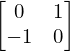

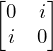

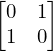

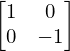

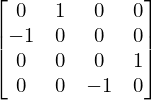

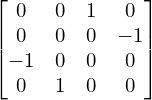

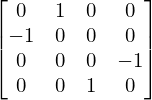

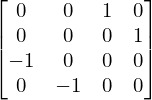

In [4]:
g1 = Matrix([[ 0, 1],[-1, 0]]);g1
g2 = Matrix([[ 0, I],[ I, 0]]);g2
s1 = Matrix([[ 0, 1],[ 1, 0]]);s1
s2 = Matrix([[ 1, 0],[ 0,-1]]);s2
Il = Matrix([[0,1,0,0],[-1,0,0,0],[0,0,0,1],[0,0,-1,0]]);Il
Jl = Matrix([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]]);Jl
Ir = Matrix([[0,1,0,0],[-1,0,0,0],[0,0,0,-1],[0,0,1,0]]);Ir
Jr = Matrix([[0,0,1,0],[0,0,0,1],[-1,0,0,0],[0,-1,0,0]]);Jr

## Implementation

Here we define `cl(s,t)` as the function that returns the generators of $Cl(s,t)$ as list of matrices.
The first entry of the list is the scalar of the algebra while the other entries are the vectors.

We use the relations:

$Cl(s,t)\equiv Cl(s-1,t-1)\otimes_{\mathbb{R}}Cl(1,1)$

$Cl(s,0)\equiv Cl(0,s-2)\otimes_{\mathbb{R}}Cl(2,0)$

$Cl(0,t)\equiv Cl(t-2,0)\otimes_{\mathbb{R}}Cl(0,2)$

In [5]:
def cl(s, t):
    if ( s < 0 ):
        return [eye(1)]
    elif ( s == 0 ):
        if ( t < 0 ):
            return [eye(1)]
        elif ( t == 0 ):
            return [eye(1)]
        elif ( t == 1 ):
            return [eye(2), s2]
        else:
            tmp = cl(t-2, s)
            new = [TensorProduct(tmp[0], eye(2))]
            for i in range(0, t+s-2):
                new.append(TensorProduct(tmp[i+1], s1*s2))
            new.append(TensorProduct(tmp[0], s1))
            new.append(TensorProduct(tmp[0], s2))
            return new
    elif ( s == 1 ):
        if ( t < 0 ):
            return [eye(1)]
        elif ( t == 0 ):
            return [eye(1), I*eye(1)]
        else:
            tmp = cl(s-1, t-1)
            new = [TensorProduct(tmp[0], eye(2))]
            for i in range(0, t+s-2):
                new.append(TensorProduct(tmp[i+1], g1*s1))
            new.append(TensorProduct(tmp[0], g1))
            new.append(TensorProduct(tmp[0], s1))
            return new
    else:
        if ( t < 0 ):
            return [eye(1)]
        elif ( t == 0 ):
            tmp = cl(t, s-2)
            new = [TensorProduct(tmp[0], eye(2))]
            for i in range(0, t+s-2):
                new.append(TensorProduct(tmp[i+1], g1*g2))
            new.append(TensorProduct(tmp[0], g1))
            new.append(TensorProduct(tmp[0], g2))
            return new
        else:
            tmp = cl(s-1, t-1)
            new = [TensorProduct(tmp[0], eye(2))]
            for i in range(0, t+s-2):
                new.append(TensorProduct(tmp[i+1], g1*s1))
            new.append(TensorProduct(tmp[0], g1))
            new.append(TensorProduct(tmp[0], s1))
            return new

The function `clifford(s,t)` returns a list of (degree 1) generators for the clifford algebra, written in a basis in which the pseudoscalar is diagonal.

In [6]:
def clifford(s, t):
    tmp = cl(s, t)
    pseudoscalar = 1;
    for i in range(0, len(tmp)):
        pseudoscalar *= tmp[i]
    if ( (I*pseudoscalar).is_Identity or (-I*pseudoscalar).is_Identity ):
        return tmp[1:]
    else:
        m = pseudoscalar.diagonalize()[0]
        new = []
        for i in range(1, len(tmp)):
            new.append(m.inv()*tmp[i]*m)
        return new

## Example 1:

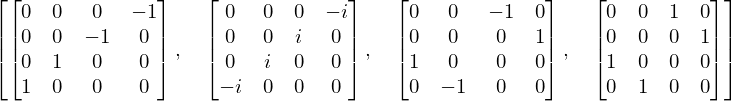

In [7]:
s = 3;
t = 1;

gamma = clifford(s,t)
gamma

signature = [];
for i in range(0, len(gamma)):
    signature.append((gamma[i]**2).trace()/gamma[0].rows)
signature

Define the pseudoscalar as $\Gamma_*=\Gamma_1\Gamma_2...\Gamma_{s+t}$

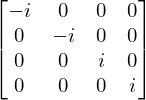

In [8]:
pseudoscalar = 1;
for i in range(0, len(gamma)):
    pseudoscalar *= gamma[i]
pseudoscalar

and check that $\Gamma_*^2=(-1)^{\frac{(s+t)(s+t-1)}{2}+s}\mathbb{1}$

In [9]:
pseudoscalar**2 == (gamma[0]**4)*(-1)**(binomial(s+t,2)+s)

True

and the element $A=\Gamma_{i_1}\Gamma_{i_2}...\Gamma_{i_t}$ such that $\Gamma_{i_k}$ are timelike

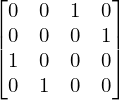

In [10]:
A = 1;
for i in range(0, len(gamma)):
    if (signature[i] == 1):
        A *= gamma[i]
A

We now check the following properties:

$\Gamma^\dagger_{(s)}=-\Gamma_{(s)}$

$\Gamma^\dagger_{(t)}=\Gamma_{(t)}$

In [11]:
for i in range(0, len(gamma)):
    gamma[i].conjugate().transpose() == signature[i]*gamma[i]

True

True

True

True

and $\Gamma^{\mu\dagger}=-(-1)^t A \Gamma^\mu A^{-1}$

In [12]:
for i in range(0, len(gamma)):
    gamma[i].conjugate().transpose()==-((-1)**t)*A*gamma[i]*(A.inv())

True

True

True

True

$\varepsilon= +1,\eta=-1:\quad s-t=0,1,2,\, \text{mod}\, 8$

$\varepsilon= +1,\eta=+1:\quad s-t=6,7,8,\, \text{mod}\, 8$

$\varepsilon= -1,\eta=-1:\quad s-t=4,5,6,\, \text{mod}\, 8$

$\varepsilon= -1,\eta=+1:\quad s-t=2,3,4,\, \text{mod}\, 8$

In [13]:
eps = 1; eta = -1;

$B^*B = \varepsilon\mathbb{1}$

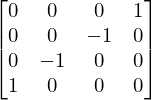

True

In [14]:
B = Matrix([[ 0, 0, 0, 1],[ 0, 0,-1, 0],[ 0, -1, 0, 0],[ 1, 0, 0, 0]])
B
B.conjugate() * B == eps * eye(B.rows)

$\Gamma^\mu = \eta B^{-1} \Gamma^{\mu*} B$

In [15]:
for i in range(0, len(gamma)):
    gamma[i] == eta * B.inv() * gamma[i].conjugate() * B

True

True

True

True

$B^T=CA^{-1}$

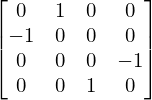

In [16]:
C = B.transpose() * A
C

$\Gamma^{\mu T} = (-1)^{t+1} \eta C \Gamma^\mu C^{-1}$

$C^\dagger C = \mathbb{1}$

$C^T = \varepsilon \eta^t (-1)^{t(t-1)/2}C$

In [17]:
for i in range(0, len(gamma)):
    gamma[i].transpose() == ((-1)**(t+1)) * eta * C * gamma[i] * C.inv()
C.conjugate().transpose() * C == eye(C.rows)
C.transpose() == eps * (eta**t) * ((-1)**binomial(t,2)) * C

True

True

True

True

True

True

$\psi^* = B\,\psi$

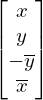

True

In [18]:
x = Symbol('x')
y = Symbol('y')
psi = Matrix([[x],[y],[-y.conjugate()],[x.conjugate()]])
psi
psi.conjugate() == B * psi

## Example 2:

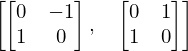

In [19]:
s = 1;
t = 1;

gamma = clifford(s,t)
gamma

signature = [];
for i in range(0, len(gamma)):
    signature.append((gamma[i]**2).trace()/gamma[0].rows)
signature

Define the pseudoscalar as $\Gamma_*=\Gamma_1\Gamma_2...\Gamma_{s+t}$

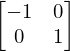

In [20]:
pseudoscalar = 1;
for i in range(0, len(gamma)):
    pseudoscalar *= gamma[i]
pseudoscalar

and check that $\Gamma_*^2=(-1)^{\frac{(s+t)(s+t-1)}{2}+s}\mathbb{1}$

In [21]:
pseudoscalar**2 == (gamma[0]**4)*(-1)**(binomial(s+t,2)+s)

True

and the element $A=\Gamma_{i_1}\Gamma_{i_2}...\Gamma_{i_t}$ such that $\Gamma_{i_k}$ are timelike

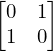

In [22]:
A = eye(pseudoscalar.rows);
for i in range(0, len(gamma)):
    if (signature[i] == 1):
        A *= gamma[i]
A

We now check the following properties:

$\Gamma^\dagger_{(s)}=-\Gamma_{(s)}$

$\Gamma^\dagger_{(t)}=\Gamma_{(t)}$

In [23]:
for i in range(0, len(gamma)):
    gamma[i].conjugate().transpose() == signature[i]*gamma[i]

True

True

and $\Gamma^{\mu\dagger}=-(-1)^t A \Gamma^\mu A^{-1}$

In [24]:
for i in range(0, len(gamma)):
    gamma[i].conjugate().transpose()==-((-1)**t)*A*gamma[i]*(A.inv())

True

True

$\varepsilon= +1,\eta=-1:\quad s-t=0,1,2,\, \text{mod}\, 8$

$\varepsilon= +1,\eta=+1:\quad s-t=6,7,8,\, \text{mod}\, 8$

$\varepsilon= -1,\eta=-1:\quad s-t=4,5,6,\, \text{mod}\, 8$

$\varepsilon= -1,\eta=+1:\quad s-t=2,3,4,\, \text{mod}\, 8$

In [25]:
eps = 1; eta = 1;

$B^*B = \varepsilon\mathbb{1}$

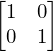

True

In [26]:
B = Matrix([[ 1, 0],[ 0, 1]])
B
B.conjugate() * B == eps * eye(B.rows)

$\Gamma^\mu = \eta B^{-1} \Gamma^{\mu*} B$

In [27]:
for i in range(0, len(gamma)):
    gamma[i] == eta * B.inv() * gamma[i].conjugate() * B

True

True

$B^T=CA^{-1}$

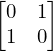

In [28]:
C = B.transpose() * A
C

$\Gamma^{\mu T} = (-1)^{t+1} \eta C \Gamma^\mu C^{-1}$

$C^\dagger C = \mathbb{1}$

$C^T = \varepsilon \eta^t (-1)^{t(t-1)/2}C$

In [29]:
for i in range(0, len(gamma)):
    gamma[i].transpose() == ((-1)**(t+1)) * eta * C * gamma[i] * C.inv()
C.conjugate().transpose() * C == eye(C.rows)
C.transpose() == eps * (eta**t) * ((-1)**binomial(t,2)) * C

True

True

True

True

$\psi^* = B\,\psi$

In [30]:
x = Symbol('x', real=True )
y = Symbol('y', real=True )
psi = Matrix([[x],[y]])
psi
psi.conjugate() == B * psi

True

## Example 3:

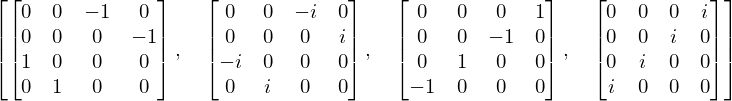

In [31]:
s = 4;
t = 0;

gamma = clifford(s,t)
gamma

signature = [];
for i in range(0, len(gamma)):
    signature.append((gamma[i]**2).trace()/gamma[0].rows)
signature